In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn import preprocessing


In [46]:
https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean 
    axis in pandas

SyntaxError: invalid syntax (3354310885.py, line 1)

In [47]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
url = 'D:\Programming\python\my_ai_lab\dataset\processed.cleveland.data'

data = pd.read_csv(url,sep = ',')

# data contain some ?'s; replace with NaN and drop those rows
data = data.replace('?',np.nan).dropna()
#setting disease value to 0 or 1
data['DISEASE'][data['DISEASE']>0] = 1
# getting descriptive stats
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Start of Preprocessing

In [48]:
#getting keys of data
keys = data.keys()
#separating categorical and numerical keys
cat_keys = ['sex','fbs','exang','DISEASE']
num_keys = []
for i in keys:
    if i in cat_keys:
        pass
    else:
        num_keys.append(i)
        
#creating num and categorical dataset for easy operation
data_cat = data[[i for i in cat_keys]]
data_num = data[[i for i in num_keys]]
#creating transform dataset header
data_tr_header = []
for i in num_keys:
    data_tr_header.append(i)
for i in cat_keys:
    data_tr_header.append(i)


In [49]:
#setting disease value to 0 or 1
data_cat['DISEASE'][data_cat['DISEASE']>0] = 1
#sns.displot(data = data['DISEASE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_20772\1866129610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['DISEASE'][data_cat['DISEASE']>0] = 1
C:\Users\hp\AppData\Local\Temp\ipykernel_20772\1866129610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['DISEASE'][data_cat['DISEASE']>0] = 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


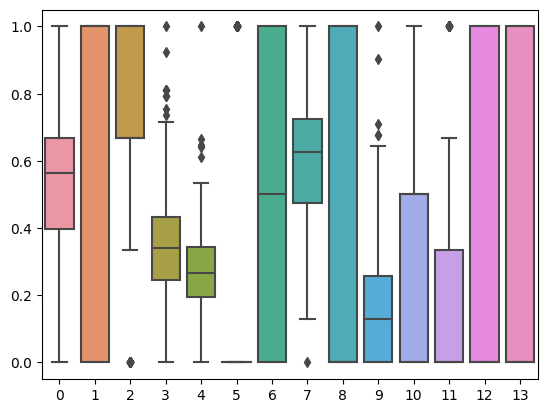

In [50]:
# normalization of data 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#('std_scaler', StandardScaler()),

num_pipeline = Pipeline([('min_max_scaler' , MinMaxScaler())])
data_tr = pd.DataFrame(num_pipeline.fit_transform(data))

#concating num_tr data and cat data
#data_tr = pd.concat([data_num_tr,data_cat], axis = 1)


#adding header to dataset
#data_tr.columns = data_tr_header

sns.boxplot(data = data_tr)
data_tr.head()

# Creating test train and validation set

In [51]:
from sklearn.model_selection import train_test_split

X = data_tr.iloc[:,:13]
y = data_tr.iloc[:,13:14]
X.head()
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size = 0.2,random_state = 42)




In [52]:
y_train.shape

(165, 1)

# Creating model

In [130]:
from tensorflow import keras

initializer = keras.initializers.HeNormal()

model1 = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape=(13,)),
    keras.layers.Dense(12,kernel_initializer=initializer, activation='elu'),
    keras.layers.Dropout(0.40),
    #tf.keras.layers.LayerNormalization(axis=1),
    keras.layers.Dense(6,kernel_initializer=initializer, activation='elu'),
    keras.layers.Dropout(0.20),
    #tf.keras.layers.LayerNormalization(axis=1),
    keras.layers.Dense(1, kernel_initializer=initializer ,activation='sigmoid')
])
    
optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum = 0.9)
loss = keras.losses.BinaryCrossentropy(from_logits=True)
model1.summary()

model1.compile(loss = loss,
optimizer= optimizer,
metrics=["accuracy"])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 12)                168       
                                                                 
 dropout_32 (Dropout)        (None, 12)                0         
                                                                 
 dense_62 (Dense)            (None, 6)                 78        
                                                                 
 dropout_33 (Dropout)        (None, 6)                 0         
                                                                 
 dense_63 (Dense)            (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


D:\Programming\python\my_ai_lab\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [131]:
# Define some useful callbacks
#Reduce learning rate when a metric has stopped improving.
reducelrp = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# Stop training when a monitored quantity has stopped improving. 
# By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.
early_stopping_monitor=keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )
# Save the model after every epoch.
best_trained_model_file= 'heart_disease_model.h5'
checkpoint = keras.callbacks.ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  
#place callbacks want to enable on this list
callbacks= [checkpoint,reducelrp] #[checkpoint,

In [132]:

#fitting the model

history1 = model1.fit(X_train,y_train, epochs=100,
validation_data=(X_valid,y_valid),callbacks = callbacks,verbose = 1
)

Epoch 1/100


D:\Programming\python\my_ai_lab\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 1s 38ms/step - loss: 0.6738 - accuracy: 0.5879 - val_loss: 0.7797 - val_accuracy: 0.4524 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7157 - accuracy: 0.5879 - val_loss: 0.7734 - val_accuracy: 0.4762 - lr: 0.0010
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.5938

D:\Programming\python\my_ai_lab\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 0s 15ms/step - loss: 0.7081 - accuracy: 0.6182 - val_loss: 0.7672 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6634 - accuracy: 0.6061 - val_loss: 0.7616 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6840 - accuracy: 0.6242 - val_loss: 0.7550 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6740 - accuracy: 0.6061 - val_loss: 0.7490 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6703 - accuracy: 0.5515 - val_loss: 0.7443 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6610 - accuracy: 0.5939 - val_loss: 0.7386 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6617 - accuracy: 0.6

6/6 [==============================] - 0s 12ms/step - loss: 0.6245 - accuracy: 0.6848 - val_loss: 0.6498 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 57/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6170 - accuracy: 0.7091 - val_loss: 0.6479 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 58/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6315 - accuracy: 0.6909 - val_loss: 0.6464 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 59/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5978 - accuracy: 0.7273 - val_loss: 0.6445 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 60/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6191 - accuracy: 0.6485 - val_loss: 0.6432 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 61/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6106 - accuracy: 0.6970 - val_loss: 0.6423 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 62/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5851 - accurac

In [133]:
#loading best model
model1 = keras.models.load_model("heart_disease_model.h5")


In [134]:
#evaluating the model
model1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8000


D:\Programming\python\my_ai_lab\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[0.47158128023147583, 0.800000011920929]

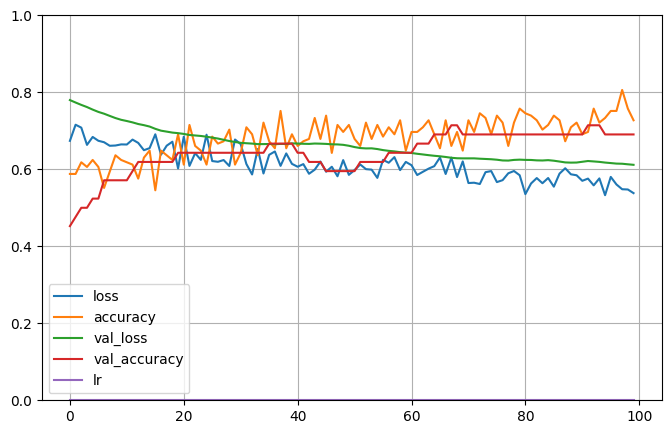

In [135]:
import matplotlib.pyplot as plt
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

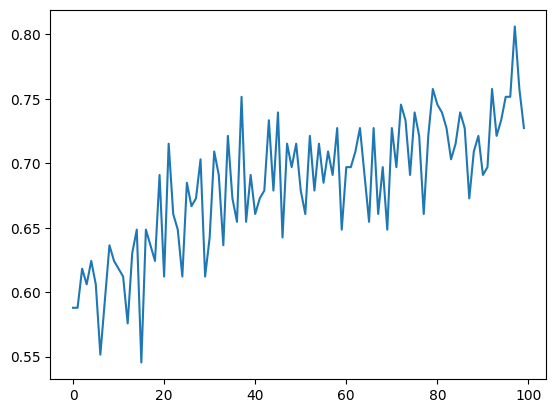

model training - finished


In [136]:
plt.plot(history1.history['accuracy'])
plt.show()
print ("model training - finished")

3/3 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8333


[0.42177098989486694, 0.8333333134651184]